In [31]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
sett_types = pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)
KSH = pd.read_csv("../../data/hun/KSHCommuting_c1ID_c1name_c2ID_c2name_comm_school_work_DIR.csv",
           sep=',',
           header=0)

In [33]:
KSH

,origID,origName,destID,destName,CommutersAll,CommutersSchool,CommutersWork
0,1508,Ipolyszög,1508,Ipolyszög,40,0,40
1,1508,Ipolyszög,3115,Dunaújváros,2,0,2
2,1508,Ipolyszög,3179,Budapest 02. ker.,2,0,2
3,1508,Ipolyszög,3249,Õrhalom,2,0,2
4,1508,Ipolyszög,4507,Szendehely,4,0,4
...,...,...,...,...,...,...,...
114040,34412,Mosonudvar,28149,Mosonszolnok,19,0,19
114041,34412,Mosonudvar,29221,Jánossomorja,5,0,5
114042,34412,Mosonudvar,31839,Újrónafõ,2,0,2
114043,34412,Mosonudvar,34412,Mosonudvar,52,0,52


In [34]:
sett_types

,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
0,Aba,17376,nagyközség,Fejér,Aba,4619,8127,47.0291,18.5217
1,Abádszalók,12441,város,Jász-Nagykun-Szolnok,Tiszafüred,3922,5241,47.4667,20.6000
2,Abaliget,12548,község,Baranya,Pécs,586,7678,46.1426,18.1168
3,Abasár,24554,község,Heves,Gyöngyös,2498,3261,47.7970,20.0032
4,Abaújalpár,15662,község,Borsod-Abaúj-Zemplén,Encs,76,3882,48.3067,21.2332
...,...,...,...,...,...,...,...,...,...
3172,Zsennye,12292,község,Vas,Szombathely,100,9766,47.1130,16.8152
3173,Zsira,4622,község,Győr-Moson-Sopron,Sopron,782,9476,47.4576,16.6773
3174,Zsombó,17765,község,Csongrád,Szeged,3552,6792,46.3257,19.9746
3175,Zsujta,11022,község,Borsod-Abaúj-Zemplén,Gönc,164,3897,48.5000,21.2833


In [35]:
len(set(KSH["origName"]))
print(set(sett_types["settlement type"]))
sett_types.groupby("settlement type").size().sort_values(ascending=False)

{'fővárosi kerület', 'község', 'megyei jogú város', 'megyeszékhely-megyei jogú város', 'város', 'főváros', 'nagyközség'}


settlement type
község                             2706
város                               304
nagyközség                          120
fővárosi kerület                     23
megyeszékhely-megyei jogú város      18
megyei jogú város                     5
főváros                               1
dtype: int64

In [36]:
sett_types[sett_types["population"]>=5000]

,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
12,Abony,27872,város,Pest,Cegléd,14876,2740,47.1899,20.0048
14,Ács,4428,város,Komárom-Esztergom,Komárom,6965,2941,47.7123,18.0113
31,Ajka,6673,város,Veszprém,Ajka,29058,8400,47.1020,17.5589
37,Albertirsa,31653,város,Pest,Cegléd,12410,2730,47.2431,19.6169
40,Algyő,34245,nagyközség,Csongrád,Szeged,5251,6750,46.3347,20.2085
...,...,...,...,...,...,...,...,...,...
3061,Vésztő,29531,város,Békés,Szeghalom,6680,5530,46.9167,21.2667
3111,Zalaegerszeg,32054,megyeszékhely-megyei jogú város,Zala,Zalaegerszeg,61849,8900,46.8400,16.8439
3129,Zalaszentgrót,32522,város,Zala,Zalaszentgrót,6473,8785,46.9447,17.0793
3157,Zirc,26499,város,Veszprém,Zirc,7096,8420,47.2636,17.8737


In [37]:
korfa_teltip0 = {
    "főváros|fővárosi kerület": [210640, 81626, 246127, 313540, 213367, 225379, 216828, 221533, 1729040],
    "megyeszékhely-megyei jogú város": [238608 , 116868 , 233585 , 287108 , 227042 , 252073 , 209260 , 197113 , 1761657],
    "megyei jogú város": [37141, 15599, 32610, 44865, 35886, 39168, 32719, 29748, 267736],
    "város": [477932, 195704, 364021, 491615, 422355, 466796, 373198, 353804, 3145425],
    "all_város": [964321, 409797, 876343, 1137128, 898650, 983416, 832005, 802198, 6903858],
    "község|nagyközség": [483338, 183737, 353193, 443785, 417543, 455266, 344957, 351951, 3033770],
    "all": [1447659 , 593534 , 1229536 , 1580913 , 1316193 , 1438682 , 1176962 , 1154149 , 9937628],
}

korfa_teltip1 = {
    "főváros": [210640, 81626, 246127, 313540, 213367, 225379, 216828, 221533, 1729040],
    "fővárosi kerület": [210640, 81626, 246127, 313540, 213367, 225379, 216828, 221533, 1729040],
    "megyeszékhely-megyei jogú város": [238608 , 116868 , 233585 , 287108 , 227042 , 252073 , 209260 , 197113 , 1761657],
    "megyei jogú város": [37141, 15599, 32610, 44865, 35886, 39168, 32719, 29748, 267736],
    "város": [477932, 195704, 364021, 491615, 422355, 466796, 373198, 353804, 3145425],
    "all_város": [964321, 409797, 876343, 1137128, 898650, 983416, 832005, 802198, 6903858],
    "község": [483338, 183737, 353193, 443785, 417543, 455266, 344957, 351951, 3033770],
    "nagyközség": [483338, 183737, 353193, 443785, 417543, 455266, 344957, 351951, 3033770],
    "all": [1447659 , 593534 , 1229536 , 1580913 , 1316193 , 1438682 , 1176962 , 1154149 , 9937628],
}
ages = ["0–14", "15–19", "20–29", "30–39", "40–49", "50–59", "60–69", "70–", "all"] 

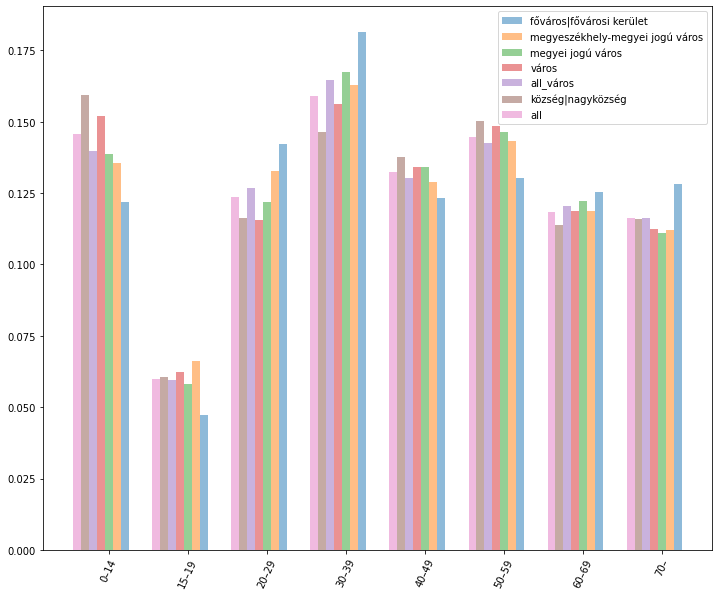

In [38]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
x = np.array(range(8))
for i, (teltip, arr) in enumerate(korfa_teltip0.items()):
    plt.bar(x-(i-2)*0.1, arr[:-1]/np.sum(arr[:-1]), label=teltip, alpha=0.5, width=0.1)
    
ax.set_xticks(x)
ax.set_xticklabels(ages[:-1], rotation=65)
plt.legend()

# Create population.json

In [39]:
def get_age(row, korfa_teltip, I, L):
    arr = np.array(korfa_teltip[row["settlement type"]])
    arr = arr[:-1]/np.sum(arr[:-1])
    N = row["population"]
    
    ages = [int(N*arr[0]/3), int(N*arr[0]/3), int(N*arr[0]/3)]
    for ratio in arr[1:-1]:
        ages += [int(N*ratio/2), int(N*ratio/2)]
    ages += [int(N*ratio)]
    ages = np.array(ages, dtype=int)
    
    Is = np.random.multinomial(I, ages/np.sum(ages))
    Ls = np.random.multinomial(L, ages/np.sum(ages))
    
    ages = [{"N": int(s), "S":int(s-i-l), "L":int(l), "I":int(i), "R":0} for s,l,i in zip(ages,Ls,Is)]
    return ages

def create_population_dict(sett_types, population_th, num_I, num_L):
    small_cities = sett_types[sett_types["population"]>population_th]
    pop = np.array(list(small_cities["population"].array))
    
    Is = np.random.multinomial(num_I, pop/np.sum(pop))
    Ls = np.random.multinomial(num_L, pop/np.sum(pop))
    
    
    place_id_dict = {}
    population = {"populations":[]}
    Sum = 0
    for ind, (_, row) in enumerate(small_cities.iterrows()):
        place_id_dict[row['place']] = ind
        city = {
            "name": str(ind),
            #"name": row["place"],
            "index": ind,
            "N": row["population"],
            "r1":0.75,
            "r2":0.15,
            "age": get_age(row, korfa_teltip1, Is[ind], Ls[ind])
        }
        population["populations"].append(city)
        Sum+=Is[ind]
        ind += 1
    return population, set(small_cities['place']), place_id_dict

In [40]:
pops,cities,place_id_dict = create_population_dict(
    sett_types, population_th=10000,
    num_I =10000,
    num_L=int(10000*(4/2.5)))
with open("../input/hun/populations_KSH.json", "w") as f:
    f.write(json.dumps(pops))

In [41]:
print(f"Number of cities: {len(cities)}")
print(f'Number of age groups {len(pops["populations"][1]["age"])}')
N = len(cities)
pops["populations"][2]

Number of cities: 168
Number of age groups 16


{'name': '2',
 'index': 2,
 'N': 12410,
 'r1': 0.75,
 'r2': 0.15,
 'age': [{'N': 628, 'S': 626, 'L': 2, 'I': 0, 'R': 0},
  {'N': 628, 'S': 626, 'L': 1, 'I': 1, 'R': 0},
  {'N': 628, 'S': 624, 'L': 1, 'I': 3, 'R': 0},
  {'N': 386, 'S': 385, 'L': 1, 'I': 0, 'R': 0},
  {'N': 386, 'S': 385, 'L': 1, 'I': 0, 'R': 0},
  {'N': 718, 'S': 714, 'L': 3, 'I': 1, 'R': 0},
  {'N': 718, 'S': 718, 'L': 0, 'I': 0, 'R': 0},
  {'N': 969, 'S': 965, 'L': 1, 'I': 3, 'R': 0},
  {'N': 969, 'S': 969, 'L': 0, 'I': 0, 'R': 0},
  {'N': 833, 'S': 831, 'L': 1, 'I': 1, 'R': 0},
  {'N': 833, 'S': 831, 'L': 1, 'I': 1, 'R': 0},
  {'N': 920, 'S': 915, 'L': 4, 'I': 1, 'R': 0},
  {'N': 920, 'S': 918, 'L': 2, 'I': 0, 'R': 0},
  {'N': 736, 'S': 731, 'L': 4, 'I': 1, 'R': 0},
  {'N': 736, 'S': 734, 'L': 1, 'I': 1, 'R': 0},
  {'N': 1472, 'S': 1465, 'L': 6, 'I': 1, 'R': 0}]}

In [42]:
# Check the number of infected agents
Sum_L = 0
Sum_I = 0
Sum_All = 0
for i in range(len(cities)):
    Sum_L += sum([age['L'] for age in pops["populations"][i]['age']])
    Sum_I += sum([age['I'] for age in pops["populations"][i]['age']])
    Sum_All += sum([age['N'] for age in pops["populations"][i]['age']])
print(Sum_L,Sum_I, Sum_All)

16000 10000 7735924


In [43]:
pop_dict = {row['place']:row["population"] for _,row in sett_types.iterrows()}

In [44]:
pop_dict

{'Aba': 4619,
 'Abádszalók': 3922,
 'Abaliget': 586,
 'Abasár': 2498,
 'Abaújalpár': 76,
 'Abaújkér': 667,
 'Abaújlak': 131,
 'Abaújszántó': 3088,
 'Abaújszolnok': 191,
 'Abaújvár': 206,
 'Abda': 3201,
 'Abod': 229,
 'Abony': 14876,
 'Ábrahámhegy': 445,
 'Ács': 6965,
 'Acsa': 1443,
 'Acsád': 672,
 'Acsalag': 452,
 'Ácsteszér': 666,
 'Adács': 2690,
 'Ádánd': 2199,
 'Adásztevel': 771,
 'Adony': 3912,
 'Adorjánháza': 338,
 'Adorjás': 181,
 'Ág': 179,
 'Ágasegyháza': 2018,
 'Ágfalva': 2178,
 'Aggtelek': 535,
 'Agyagosszergény': 882,
 'Ajak': 3528,
 'Ajka': 29058,
 'Aka': 278,
 'Akasztó': 3230,
 'Alacska': 748,
 'Alap': 1925,
 'Alattyán': 2101,
 'Albertirsa': 12410,
 'Alcsútdoboz': 1446,
 'Aldebrő': 649,
 'Algyő': 5251,
 'Alibánfa': 453,
 'Almamellék': 428,
 'Almásfüzitő': 2174,
 'Almásháza': 69,
 'Almáskamarás': 835,
 'Almáskeresztúr': 83,
 'Álmosd': 1555,
 'Alsóberecki': 722,
 'Alsóbogát': 258,
 'Alsódobsza': 319,
 'Alsógagy': 97,
 'Alsómocsolád': 329,
 'Alsónána': 689,
 'Alsónémedi': 520

# Create commuting.json

In [14]:
edges = {}
mtx = np.zeros((N,N))
for _,row in KSH.iterrows():
    weight = row["CommutersAll"]
    orig,dest = row["origName"], row["destName"]
    if((orig in cities) and (dest in cities)):
        edges[(place_id_dict[orig], place_id_dict[dest])] = weight/pop_dict[orig]
        mtx[place_id_dict[orig], place_id_dict[dest]] = weight/pop_dict[orig]

In [15]:
print(f"#of edges: {len(edges)} [{N**2}] ==> {100*len(edges)/N**2:.3f}% density")

#of edges: 10502 [28224] ==> 37.209% density


In [16]:
network = []
for i in range(N):
    for j in range(N):
        if(i==j): continue
        network.append({"from":i, "to":j, "weight":mtx[i,j]})

commuting = {
    "N":N,
    "network":network
}

In [17]:
len(network)

28056

In [18]:
with open("../input/hun/commuting_KSH.json", "w") as f:
    f.write(json.dumps(commuting))

# Create the config.json

In [19]:
d = {
  "commuting_file": "commuting_KSH.json",
  "populations_file": "populations_KSH.json",
  "contacts_file_home": "contacts_home.json",
  "contacts_file_other": "contacts_other.json",
  "Npop":f"{len(cities)}"}

with open("../input/hun/config.json", "w") as f:
    f.write(json.dumps(d, indent=4))

# Results

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
real_data = pd.read_csv("../../data/hun/hun_infected.csv", sep=',')
real_data=real_data.rename(columns={
    "Dátum": "date",
    "Az új fertőzöttek számának napi alakulása Magyarországon": "I",
    "Hétnapos mozgóátlag":"avg"})[181:181+190].reset_index()
real_data

,index,date,I,avg
0,181,2020-09-01,118.0,"148,85714286"
1,182,2020-09-02,365.0,"190,57142857"
2,183,2020-09-03,301.0,"220,57142857"
3,184,2020-09-04,459.0,"267,28571429"
4,185,2020-09-05,510.0,"317,57142857"
...,...,...,...,...
185,366,2021-03-05,6369.0,"4 766,42857143"
186,367,2021-03-06,7269.0,"5 098,00000000"
187,368,2021-03-07,6201.0,"5 345,42857143"
188,369,2021-03-08,2696.0,"5 112,57142857"


In [16]:
def read_df(filename):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0]=='I']
    Is = df.filter(inf_cols, axis=1)
    #N = sum(pop_dict.values())
    return Is

def get_inf_curve(filename):
    sim = read_df(filename)
    return sim.sum(axis=1)

In [19]:
sim0 = read_df("../output/results.txt")
sim1 = read_df("../output/results.txt")
#sim1 = read_df("../output/sim/sim1.txt")

Text(0.5, 1.0, 'Simalation vs real data')

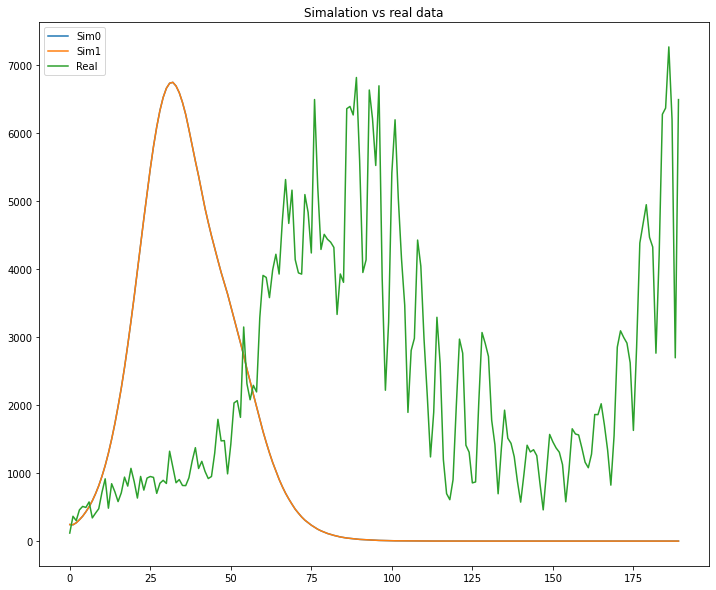

In [20]:
plt.figure(figsize=(12, 10))
plt.plot(sim0.sum(axis=1)*(0.015), label="Sim0")
plt.plot(sim1.sum(axis=1)*0.015, label="Sim1")
plt.plot(real_data["I"], label="Real")
plt.legend()
plt.title("Simalation vs real data")

In [21]:
165*16*10

26400

# All togeather

In [48]:
base_args = {
    "--config": "../input/hun",
    "--out": "../output/sim/temp.txt",
    "--maxT": "150"
}

global_args = {
    "procnum": 20,
}

In [49]:
import os
import copy
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
from subprocess import Popen, STDOUT, PIPE

def run(args, job_count, lock):
    # Run
    str_args = [str(item) for pair in args.items() for item in pair]
    #print(" ".join([ "../bin/main"] + str_args))
    p = Popen([ "../bin/main"] + str_args,
          stdout=PIPE, stdin=PIPE, stderr=STDOUT, bufsize=1, universal_newlines=True)

    out,err = p.communicate()
    #print(out)
    
    # Alert master, if ready
    with lock:
        job_count[0]+=1
        print('\r {}/{}'.format(job_count[0], job_count[1]), end='', flush=True)

    return 0

def measure(meas_name, arg_name, arg_space):
    # Init pool
    pool = multiprocessing.Pool(processes=global_args["procnum"])
    manager = multiprocessing.Manager()
    lock = manager.Lock()
    job_count = manager.Array("i", [0,len(arg_space)])
    
    os.makedirs(f"../output/{meas_name}", exist_ok=True)
    
    # Run async
    sims = {}
    for i,x in enumerate(arg_space):
        x = np.round_(x, decimals=4)
        args = copy.copy(base_args)
        args["--out"]=f"../output/{meas_name}/{i}.txt"
        args[arg_name]=f"{x}"
        #sims[(x,args["--out"])] = None
        sims[(x,args["--out"])] = pool.apply_async(run, args =(args, job_count, lock))
    
    # Collect async
    for k,v in sims.items():
        v.get()
    
    pool.close()
    pool.join()
    
    return sims.keys()

def get_inf_curve(filename):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0]=='I']
    Is = df.filter(inf_cols, axis=1)
    return Is.sum(axis=1)

In [50]:
base_args = {
    "--config": "../input/hun",
    "--out": "../output/sim/temp.txt",
    "--maxT": "150",
    "--moving_t": "50",
    "--R0": "1.3158",
}

In [ ]:
sims = measure("r2", "--r2", np.linspace(1.0, 1.4, 20))

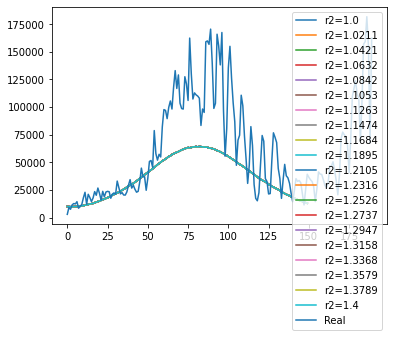

In [54]:
for val,file in sims:
    plt.plot(get_inf_curve(file), label=f"r2={val}")
plt.plot(real_data["I"]*25, label="Real")
plt.legend()

In [28]:
sims = measure("R0", "--R0", np.linspace(1.0, 2.0, 20))

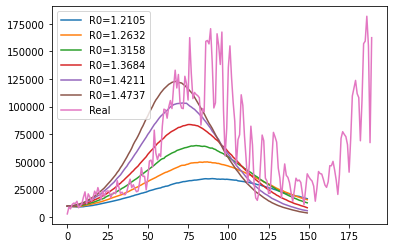

In [29]:
for val,file in sims:
    if(val < 1.5 and val > 1.2):
        #print(val,'\n', get_inf_curve(file))
        plt.plot(get_inf_curve(file), label=f"R0={val}")
plt.plot(real_data["I"]*25, label="Real")
plt.legend()

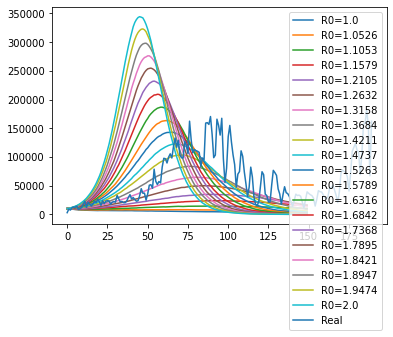

In [30]:
for val,file in sims:
    plt.plot(get_inf_curve(file), label=f"R0={val}")
plt.plot(real_data["I"]*25, label="Real")
plt.legend()

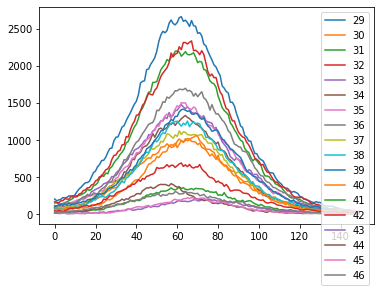

In [47]:
df = pd.read_csv("../output/R0/10.txt", sep=',')
for i in range(29, 47):
    inf_cols = [c for c in df.columns if c[0:4]==f'I_{i}']
    Is = df.filter(inf_cols, axis=1)
    plt.plot(Is.sum(axis=1), label=f"{i}")

plt.legend()

In [48]:
sims = measure("r1", "--r1", np.linspace(0.6, 1.0, 20))

 20/20

0.6 
 0       9996
1      10143
2      10408
3      10731
4      11024
       ...  
145     2021
146     1899
147     1729
148     1609
149     1513
Length: 150, dtype: int64
0.6211 
 0       9891
1      10078
2      10279
3      10688
4      11034
       ...  
145     1299
146     1181
147     1155
148     1095
149      974
Length: 150, dtype: int64
0.6421 
 0       9944
1      10183
2      10508
3      10817
4      11318
       ...  
145      745
146      671
147      602
148      542
149      504
Length: 150, dtype: int64
0.6632 
 0       9926
1      10109
2      10604
3      11023
4      11557
       ...  
145      390
146      356
147      325
148      297
149      284
Length: 150, dtype: int64
0.6842 
 0      10041
1      10296
2      10710
3      11394
4      11938
       ...  
145      292
146      265
147      247
148      217
149      211
Length: 150, dtype: int64
0.7053 
 0       9974
1      10387
2      10934
3      11488
4      12221
       ...  
145      111
146       97


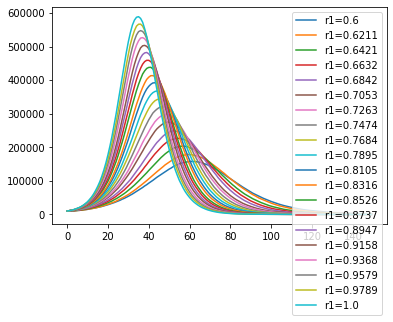

In [49]:
for val,file in sims:
    #print(val,'\n', get_inf_curve(file))
    plt.plot(get_inf_curve(file), label=f"r1={val}")
plt.legend()